## Penalised Regression: Ridge Regression w/ Linear Splines
-Contents
-Notes
-Source: https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/


In [38]:
import pandas as pd
import numpy as np

from sklearn.linear_model import RidgeCV

from matplotlib import pyplot as plt
%matplotlib inline 

***Functions***

In [39]:
#import helper functions
from fn_helpers import fn_print_coefficients, fn_plot_predictions

#plot data
def fn_plot_data(data):
    fig = plt.figure(figsize = (8,8))
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(data['x_1'],data['y'],'k.')
    ax1.set_xlabel('x_1',fontsize=20)
    ax1.set_ylabel('y',fontsize=20)

***Create some data***
- simulate random values for x in interval [0,1]
- compute y based on a sine function
- add gaussian noise to y

In [40]:
np.random.seed(2018)
n = 3030
x = np.random.uniform(0,1,n) #uniform random sample of size n
y = np.sin(5*x) # y = sin(5x)
e = np.random.normal(0,1/3,n) #noise (gaussian) with mean 0 and variance 1/3
y += e # y = sin(5x) + noise (white noise error term)

df_all = pd.DataFrame({'y': y,
                      'x_1': x})

#split the data into train and test sets
df_train = df_all.iloc[0:30]
df_test = df_all.iloc[30:3030]

In [41]:
vars_ind_numeric = ['x_1']
vars_ind_tospline = ['x_1']

***Create splines***

In [42]:
#split any particular feature by a certain number of percentiles

In [43]:
# var = 'x_1'
# x = df_train[var].values #values of x_1 in train data

# #split feature into percentiles 
# ptiles = np.percentile(df_train[var],5*(1+np.arange(20)))
# #create dataframe which contains the original variable and its original values
# df_ptiles = pd.DataFrame({var: x})
# # df_ptiles.head() #check to make sure as expected

# #now add splines
# for idx, ptile in enumerate(ptiles):
#     #NOTE: spline variable is max(0, x - value of knot)
#     df_ptiles[var + '_'+str(idx)] = np.maximum(0, x - ptiles[idx])


# #each linear spline is defined by a knot: 
# #to the left of the knot, the value is 0.
# #to the right of the knot, the value starts sloping upwards and is given by:
# #x-knot

# #EX 1: 
# #first percentile (i.e. ptile[0]) is 0.10562704. This is the knot.
# #first x (i.e. x_1[0]) is 0.882349.
# #corresponding spline (i.e. x_1_0[0]) is 0.882349-0.10562704 = 0.77672196
# print('EX 1: {:7.5f}'.format(df_ptiles[var+'_0'].iloc[0]))

# #EX 2: 
# #first percentile (i.e. ptile[0]) is 0.10562704. This is the knot.
# #second x is (i.e. x_1[1]) is 0.104328. Note x_1 < ptile
# #corresponding spline (i.e. x_1_0[1]) is 0.104328-0.10562704 = -0.00129904
# #and therefore 0 (ZERO!!) as we take max between 0 and calculated value
# print('EX 2: {:7.5f}'.format(df_ptiles[var+'_0'].iloc[1]))

# #EX 3: 
# #fourth percentile (i.e. ptile[3]) is 0.21642389. This is the knot.
# #fourth x (i.e. x_1[3]) is 0.306399.
# #spline (x_1_3[3])is 0.306399-0.21642389 = 0.08997511
# print('EX 3: {:7.5f}'.format(df_ptiles[var+'_3'].iloc[3]))

# #check to make sure as expected
# print(ptiles)
# df_ptiles.head() 

***Turning the above into a function ***

In [44]:
def fn_tosplines(varname,x):
#takes a feature name and the values of that feature

    #split feature into percentiles 
    ptiles = np.percentile(x,5*(1+np.arange(10)))

    #create dataframe which contains the original variable and its original values
    df_ptiles = pd.DataFrame({var: x})

    #now add splines
    for idx, ptile in enumerate(ptiles):
        #NOTE: spline variable is max(0, x - value of knot)
        df_ptiles[var + '_' + str(idx)] = np.maximum(0, x - ptiles[idx])
    return [df_ptiles, ptiles]

***Spline all numeric indep. variables***
- Use the above function
- NOTE: The below code may cause issues if trying to spline variables which has less than 10 unique values. May be best to check cardinality and spline only those with certain number of unique values for ex 20.

In [45]:
#iterate over variables which we want to turn into a spline
#append slines to data
# #create copy of data
# df_temp = df_all.copy()
# for var in vars_ind_tospline: 
#     df_ptiles, knots = fn_tosplines(var, df_all[var].values)
#     #drop original variable after having created splines from it
#     #as adding back the splines will also add back original var
#     df_temp.drop(columns = [var], inplace=True)
#     #remove it from list of numeric independent vars for same reason
#     vars_ind_numeric.remove(var)
#     #append spline columns (for current var) to dataset
#     df_temp = pd.concat([df_temp, df_ptiles],axis=1, sort=False)
#     vars_ind_numeric.extend(df_ptiles.columns.tolist())

for var in vars_ind_tospline: 
    df_ptiles, knots = fn_tosplines(var, df_all[var].values)
    #drop original variable after having created splines from it
    #as adding back the splines will also add back original var
    df_all.drop(columns = [var], inplace=True)
    #remove it from list of numeric independent vars for same reason
    vars_ind_numeric.remove(var)
    #append spline columns (for current var) to dataset
    df_all = pd.concat([df_all, df_ptiles],axis=1, sort=False)
    vars_ind_numeric.extend(df_ptiles.columns.tolist())

In [46]:
# df_all = df_temp
df_all.head()

,y,x_1,x_1_0,x_1_1,x_1_2,x_1_3,x_1_4,x_1_5,x_1_6,x_1_7,x_1_8,x_1_9
0,-0.291049,0.882349,0.823343,0.772192,0.723931,0.678290,0.628268,0.576941,0.529297,0.478928,0.428195,0.381343
1,0.385600,0.104328,0.045321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-1.118268,0.907009,0.848003,0.796852,0.748591,0.702950,0.652928,0.601601,0.553957,0.503588,0.452855,0.406003
3,1.427374,0.306399,0.247392,0.196241,0.147980,0.102339,0.052318,0.000990,0.000000,0.000000,0.000000,0.000000
4,0.774178,0.446409,0.387402,0.336251,0.287990,0.242349,0.192328,0.141000,0.093357,0.042988,0.000000,0.000000


***Recreate train and test data over new df_all***

In [47]:
df_train = df_all.iloc[0:30]
df_test = df_all.iloc[30:]

***Plot the data***


In [48]:
# fn_plot_data(df_all)

In [49]:
# fn_plot_data(df_train)

*** Create features for polynomial regression ***
- i.e. feature engineering, creating polynomial features

In [50]:
# #creates an extra 15 columns, x^2, x^3, ..., x^16
# for idx in range(2,16):  #power of 1 is already there
#     colname = 'x_%d'%idx      #new var will be x_power
#     df_all[colname] = df_all['x_1']**idx
# df_train = df_all.iloc[0:30]

In [51]:
# print(df_all.iloc[:,0:5].head(30))

### Ridge Regression

***Ridge regression using sklearn RidgeCV***

In [52]:
#define independent variables
vars_x = [var for var in df_all.columns.values if var != 'y']
X = df_train[vars_x]
y = df_train['y']

Note: RidgeCV seems particularly poor in its default choice for alphas

In [53]:
model = RidgeCV(alphas = [2**num for num in range(-10,10)])
model.fit(X=X, y=y)

RidgeCV(alphas=[0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [54]:
# model = fn_ridgeCV(df_all)
#inspect coefficients
# fn_print_coefficients(model)

# model.coef_.shape


*** PLOTTING PREDICTIONS ***

Text(0.5, 1.0, 'test data')

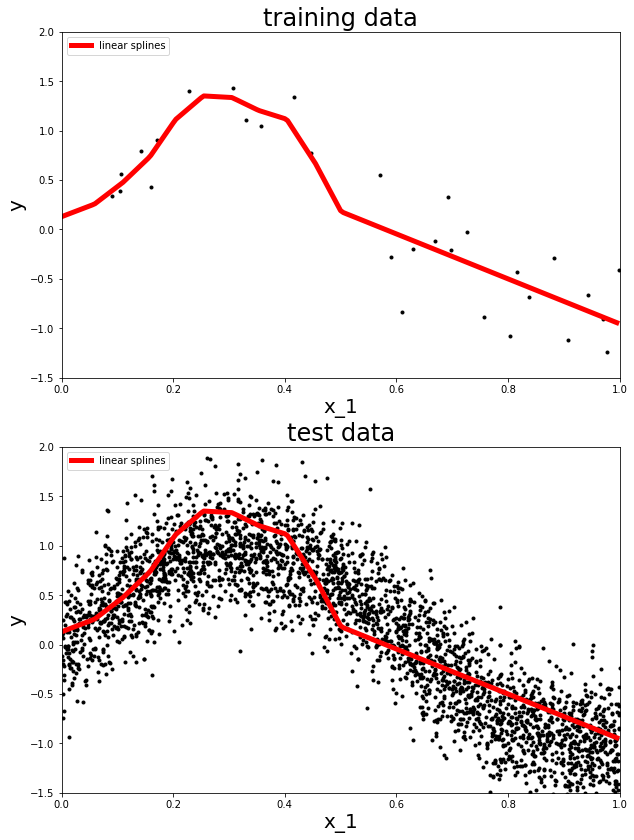

In [55]:
# Create 200 points in the x axis and compute the predicted val for each point

df_ptiles = pd.DataFrame({'x_1':[i/200.0 for i in range(200)]})

for idx, knot in enumerate(knots):
    df_ptiles[var +'_' + str(idx)] = np.maximum(0, df_ptiles['x_1'] - knot)

y_pred = model.predict(df_ptiles)

#plot predictions TRAIN
fig = plt.figure(figsize=(10,14))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(df_all.iloc[0:30]['x_1'], df_all.iloc[0:30]['y'],'k.')
ax1.set_xlabel('x_1', fontsize=20)
ax1.set_ylabel('y', fontsize=20)
ax1.plot(df_ptiles['x_1'],
        y_pred, 'r-',
        label='linear splines',
        linewidth=5)
ax1.legend(loc='upper left')
ax1.axis([0,1,-1.5,2])
ax1.set_title('training data', fontsize = 24)

#plot predictions TEST

ax2.plot(df_all.iloc[30:]['x_1'], df_all.iloc[30:]['y'],'k.')
ax2.set_xlabel('x_1', fontsize=20)
ax2.set_ylabel('y', fontsize=20)
ax2.plot(df_ptiles['x_1'],
        y_pred, 'r-',
        label='linear splines',
        linewidth=5)
ax2.legend(loc='upper left')
ax2.axis([0,1,-1.5,2])
ax2.set_title('test data', fontsize = 24)


*** Function to fit a polynomial regression model ***
- note that parameter <i>alpha = l2_penalty</i> 

In [56]:
# def fn_ridge_regression(data, degree, l2_penalty):
#     #instantiate
#     #note that the parameter alpha below is normally referred to as lambda
    
#     #identical to polynom regression, BUT
#     #call Ridge instead of LinearRegression
#     model = Ridge(alpha=l2_penalty) 
#     vars_x = ['x_1']
#     if degree >=2:
#         vars_x.extend(['x_%d'%i for i in range(2,degree+1)])
    
#     data_toUse = data[vars_x].copy()
#     #fit linear regression, using polynomial data
    
#     model.fit(X=data_toUse, y=data['y'])
    
#     return model

***Fit a degree-15 polynomial with very SMALL penalty***


In [57]:
# model = fn_ridge_regression(df_train, degree=15, l2_penalty=1e-25)

Inspect learned parameters

In [21]:
# print(model.intercept_) #prints intercept
# print(model.coef_.flatten()) #prints coefficients
# fn_print_coefficients(model)

Form and plot our predictions along a grid of x values:

In [22]:
# fn_plot_predictions(df_all,model)

***Fit a degree-15 polynomial with very LARGE penalty***
- note the size of the coefficients!

In [23]:
# model = fn_ridge_regression(df_train, degree=15, l2_penalty=1e+10)
# fn_print_coefficients(model)
# fn_plot_predictions(df_all, model)

***Fit a 15-degree polynomial using a REASONABLE penalty***

In [24]:
# model = fn_ridge_regression(df_train, degree=15, l2_penalty=1e-3)
# fn_print_coefficients(model)
# fn_plot_predictions(df_all, model)